# ARIMA

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = (18,7)

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/Naren8520/Serie-de-tiempo-con-Machine-Learning/main/Data/Esperanza_vida.csv", usecols=[1,2])
df.head()

,year,value
0,1960-01-01,69.123902
1,1961-01-01,69.760244
2,1962-01-01,69.149756
3,1963-01-01,69.248049
4,1964-01-01,70.311707


In [ ]:
df["unique_id"]="1"
df.columns=["ds", "y", "unique_id"]
df.head()

,ds,y,unique_id
0,1960-01-01,69.123902,1
1,1961-01-01,69.760244,1
2,1962-01-01,69.149756,1
3,1963-01-01,69.248049,1
4,1964-01-01,70.311707,1


In [ ]:
print(df.dtypes)

ds            object
y            float64
unique_id     object
dtype: object


In [ ]:
df["ds"] = pd.to_datetime(df["ds"])

In [ ]:
!pip install statsforecast

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.4/354.4 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.8/285.8 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 11.9 MB/s eta 0:00:00


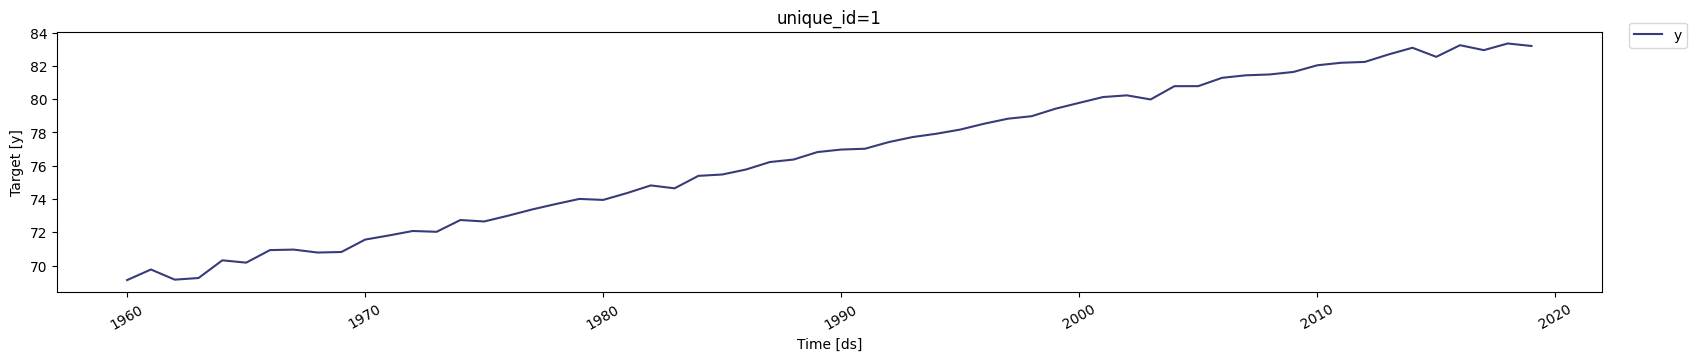

In [ ]:
from statsforecast import StatsForecast

StatsForecast.plot(df)

,y
count,60.000000
mean,76.632439
std,4.495279
min,69.123902
25%,72.712622
50%,76.895122
75%,80.781098
max,83.346341


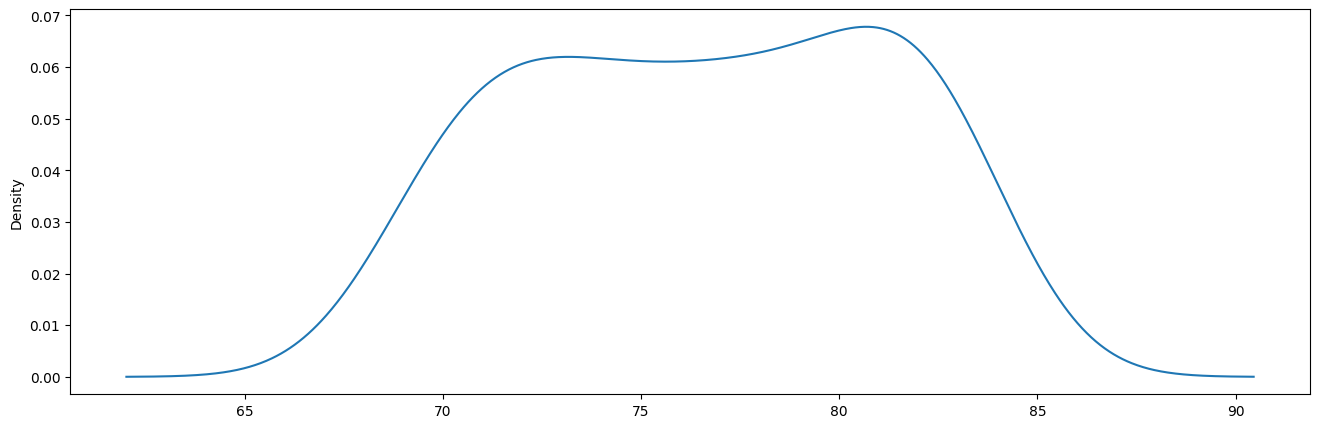

In [ ]:
df["y"].plot(kind='kde',figsize = (16,5))
df["y"].describe()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

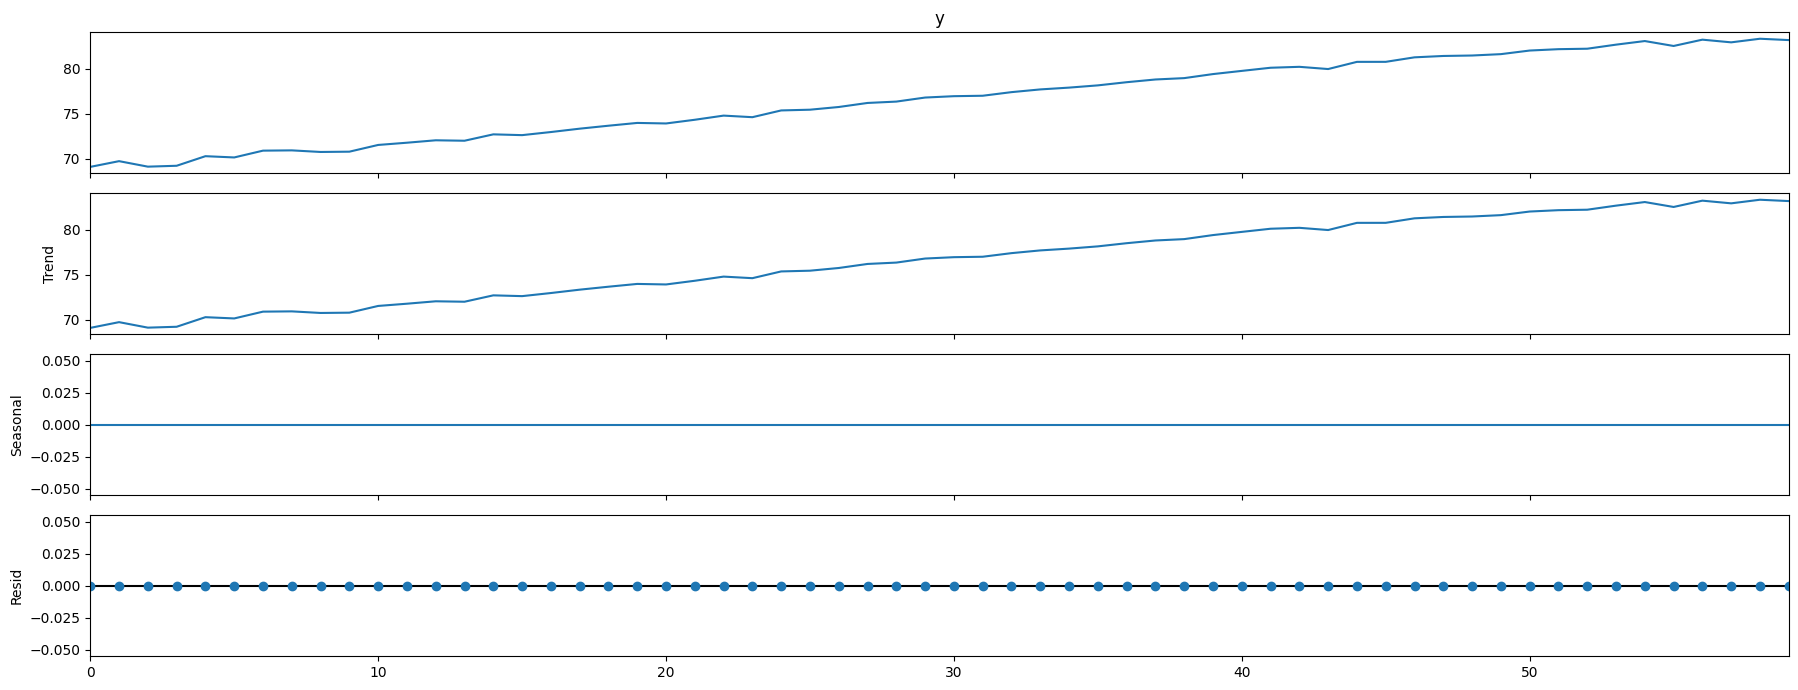

In [ ]:
decomposed=seasonal_decompose(df["y"], model = "add", period=1)
decomposed.plot()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
# def Augmented_Dickey_Fuller_Test_func(series , column_name):
#     print (f'Dickey-Fuller test results for columns: {column_name}')
#     dftest = adfuller(series, autolag='AIC')
#     dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of observations used'])
#     for key,value in dftest[4].items():
#         dfoutput['Critical Value (%s)'%key] = value
#     print (dfoutput)
#     if dftest[1] <= 0.05:
#         print("Conclusion:====>")
#         print("Reject the null hypothesis")
#         print("The data is stationary")
#     else:
#         print("Conclusion:====>")
#         print("The null hypothesis cannot be rejected")
#         print("The data is not stationary")

In [ ]:
adfuller(df["y"])

(np.float64(-1.5785902570090407),
 np.float64(0.49433875973492786),
 2,
 57,
 {'1%': np.float64(-3.5506699942762414),
  '5%': np.float64(-2.913766394626147),
  '10%': np.float64(-2.5946240473991997)},
 np.float64(-10.381876024210229))

In [ ]:
df1=df.copy()
df1['y_diff'] = df['y'].diff()
df1.dropna(inplace=True)
df1.head()

,ds,y,unique_id,y_diff
1,1961-01-01,69.760244,1,0.636341
2,1962-01-01,69.149756,1,-0.610488
3,1963-01-01,69.248049,1,0.098293
4,1964-01-01,70.311707,1,1.063659
5,1965-01-01,70.171707,1,-0.140000


In [ ]:
adfuller(df1['y_diff'])

(np.float64(-8.51009975733831),
 np.float64(1.1737760312328632e-13),
 1,
 57,
 {'1%': np.float64(-3.5506699942762414),
  '5%': np.float64(-2.913766394626147),
  '10%': np.float64(-2.5946240473991997)},
 np.float64(-5.512107228858611))

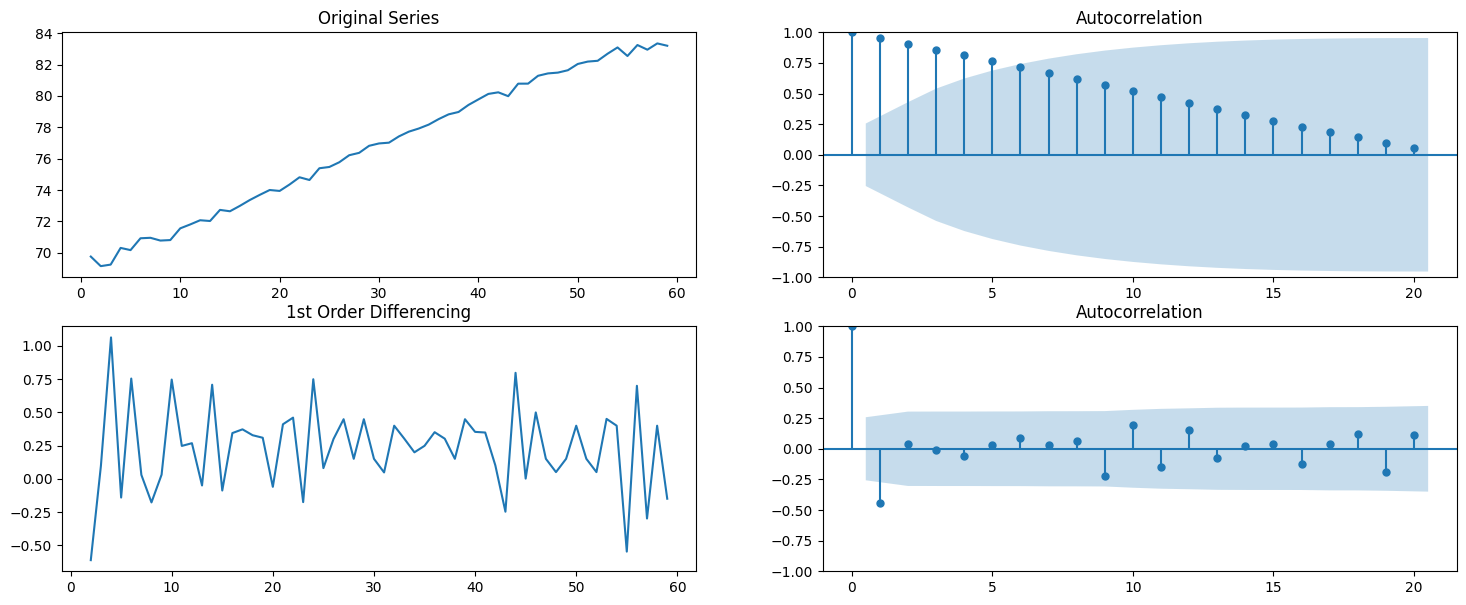

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt


fig, axes = plt.subplots(2, 2, )
axes[0, 0].plot(df1["y"]); axes[0, 0].set_title('Original Series')
plot_acf(df1["y"], ax=axes[0, 1],lags=20)

axes[1, 0].plot(df1["y"].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df1["y"].diff().dropna(), ax=axes[1, 1],lags=20)


plt.show()

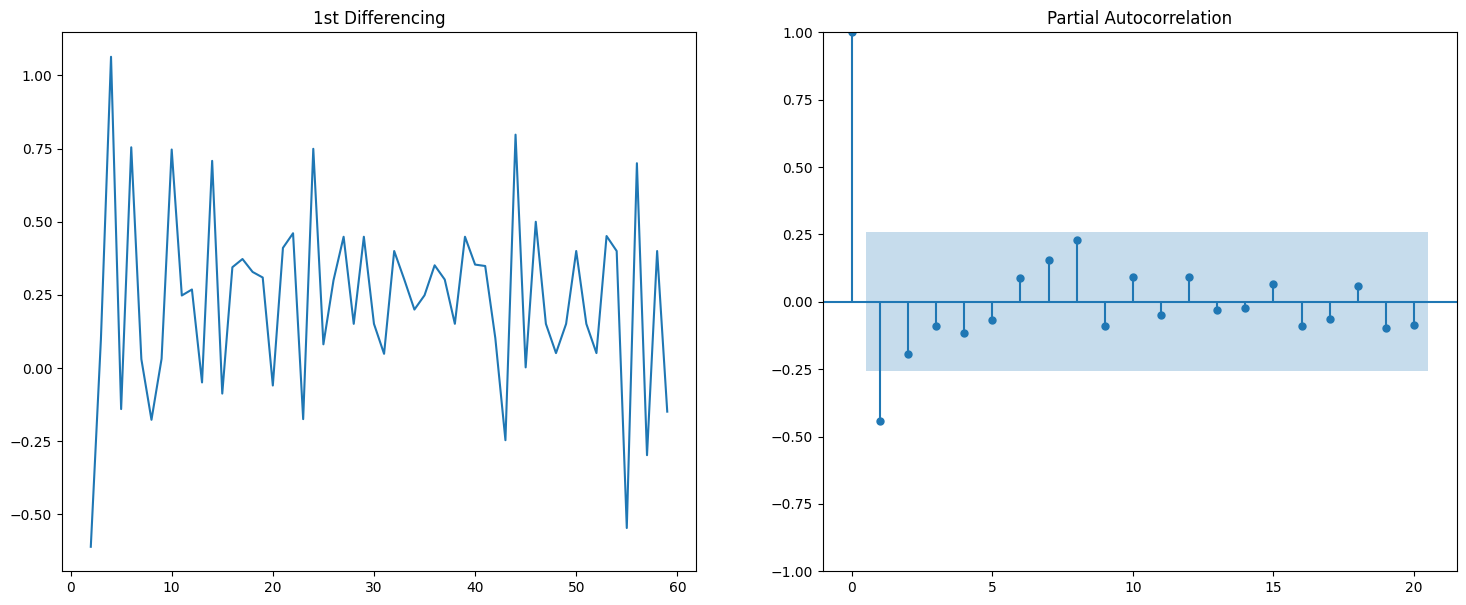

In [ ]:
fig, axes = plt.subplots(1, 2)
axes[0].plot(df1["y"].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df1["y"].diff().dropna(), ax=axes[1],lags=20)

plt.show()

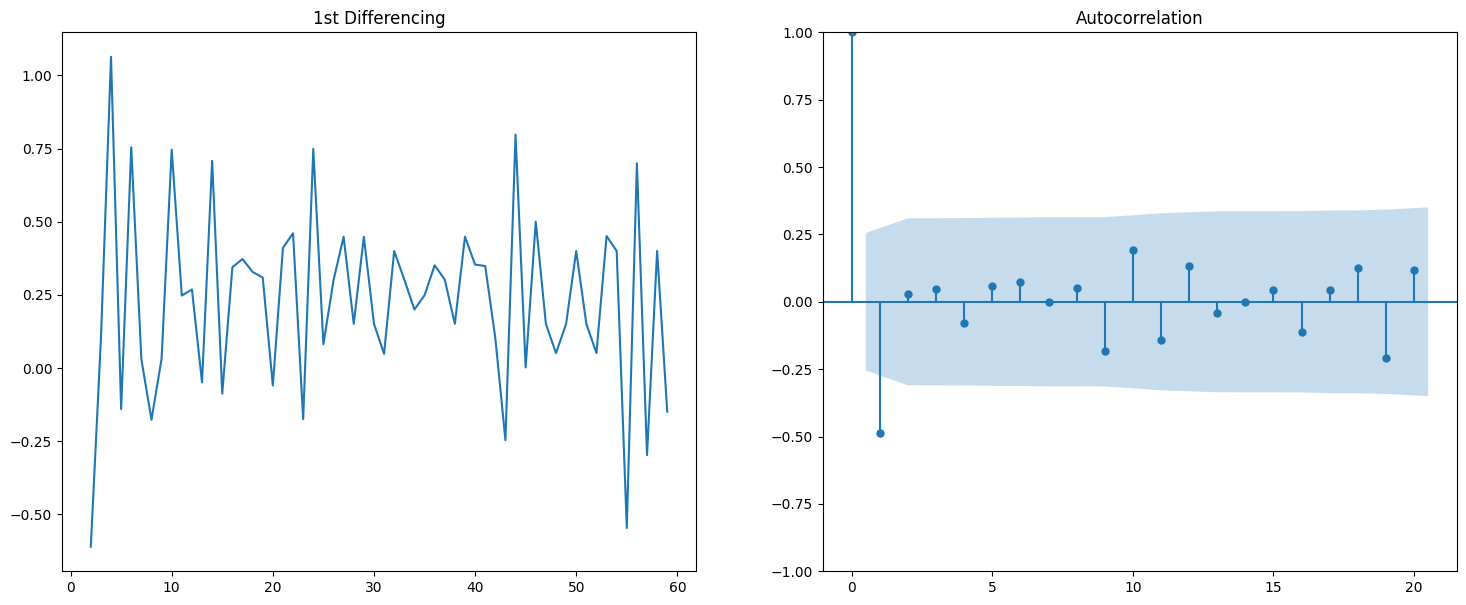

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

fig, axes = plt.subplots(1, 2)
axes[0].plot(df1["y"].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df["y"].diff().dropna(), ax=axes[1], lags=20)

plt.show()

In [ ]:
from statsforecast import StatsForecast
from statsforecast.models import ARIMA

In [ ]:
sf = StatsForecast(models=[ARIMA(order=(1, 1, 1))], freq='YS')

In [ ]:
sf.fit(df)

StatsForecast(models=[ARIMA])

In [ ]:
y_hat = sf.predict(h=6)
y_hat

,unique_id,ds,ARIMA
0,1,2020-01-01,83.206903
1,1,2021-01-01,83.203508
2,1,2022-01-01,83.204742
3,1,2023-01-01,83.204293
4,1,2024-01-01,83.204456
5,1,2025-01-01,83.204397


In [ ]:
y_hat2 = sf.predict(h=6, level=[95])
y_hat2

,unique_id,ds,ARIMA,ARIMA-lo-95,ARIMA-hi-95
0,1,2020-01-01,83.206903,82.412336,84.001469
1,1,2021-01-01,83.203508,82.094625,84.312391
2,1,2022-01-01,83.204742,81.848344,84.561139
3,1,2023-01-01,83.204293,81.640430,84.768156
4,1,2024-01-01,83.204456,81.457145,84.951767
5,1,2025-01-01,83.204397,81.291297,85.117497


In [ ]:
Y_hat_df = sf.forecast(df=df, h=6, level=[95])
Y_hat_df

,unique_id,ds,ARIMA,ARIMA-lo-95,ARIMA-hi-95
0,1,2020-01-01,83.206903,82.412336,84.001469
1,1,2021-01-01,83.203508,82.094625,84.312391
2,1,2022-01-01,83.204742,81.848344,84.561139
3,1,2023-01-01,83.204293,81.640430,84.768156
4,1,2024-01-01,83.204456,81.457145,84.951767
5,1,2025-01-01,83.204397,81.291297,85.117497


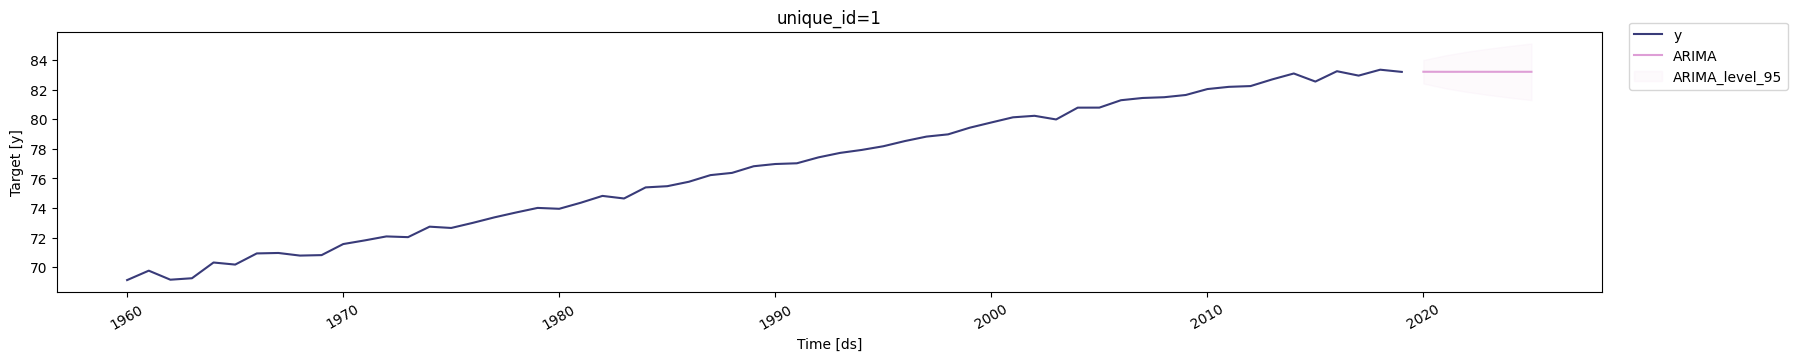

In [ ]:
sf.plot(df, Y_hat_df, level=[95])

In [ ]:
Y_train_df = df[df.ds<='2013-01-01']
Y_test_df = df[df.ds>'2013-01-01']

Y_train_df.shape, Y_test_df.shape

((54, 3), (6, 3))

In [ ]:
Y_hat_df = sf.forecast(df=Y_train_df, h=len(Y_test_df))

In [ ]:
import utilsforecast.losses as ufl
from utilsforecast.evaluation import evaluate

In [ ]:
evaluate(
    Y_test_df.merge(Y_hat_df),
    metrics=[ufl.mse, ufl.mae, ufl.rmse, ufl.mape],
)

,unique_id,metric,ARIMA
0,1,mse,0.184000
1,1,mae,0.397932
2,1,rmse,0.428952
3,1,mape,0.004785


# Auto ARIMA

In [ ]:
import numpy as np
import pandas as pd

import scipy.stats as stats

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Naren8520/Serie-de-tiempo-con-Machine-Learning/main/Data/candy_production.csv")
df.head()

,observation_date,IPG3113N
0,1972-01-01,85.6945
1,1972-02-01,71.8200
2,1972-03-01,66.0229
3,1972-04-01,64.5645
4,1972-05-01,65.0100


In [ ]:
df["unique_id"]="1"
df.columns=["ds", "y", "unique_id"]
df.head()

,ds,y,unique_id
0,1972-01-01,85.6945,1
1,1972-02-01,71.8200,1
2,1972-03-01,66.0229,1
3,1972-04-01,64.5645,1
4,1972-05-01,65.0100,1


In [ ]:
print(df.dtypes)

ds            object
y            float64
unique_id     object
dtype: object


In [ ]:
df["ds"] = pd.to_datetime(df["ds"])

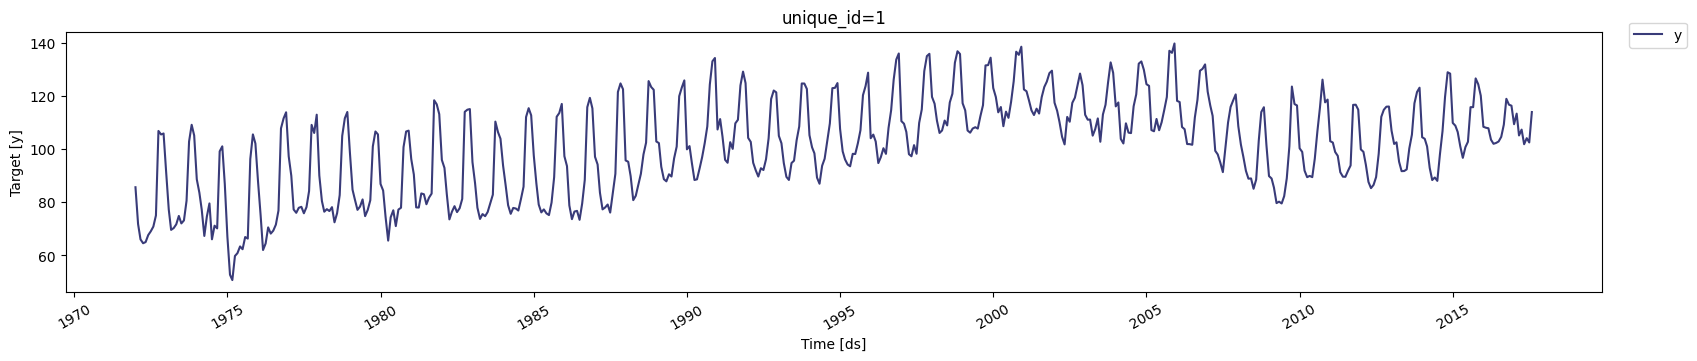

In [ ]:
from statsforecast import StatsForecast

StatsForecast.plot(df)

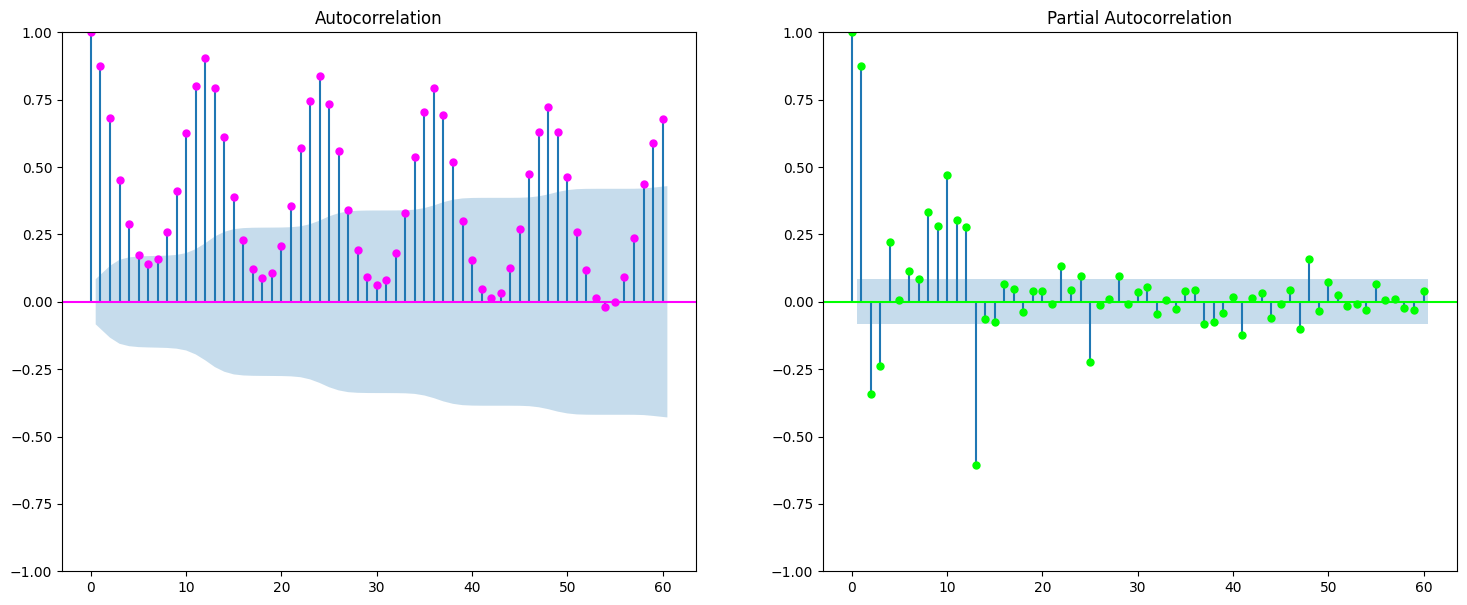

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2)

plot_acf(df["y"],  lags=60, ax=axs[0],color="fuchsia")
axs[0].set_title("Autocorrelation");

plot_pacf(df["y"],  lags=60, ax=axs[1],color="lime")
axs[1].set_title('Partial Autocorrelation')

plt.show();

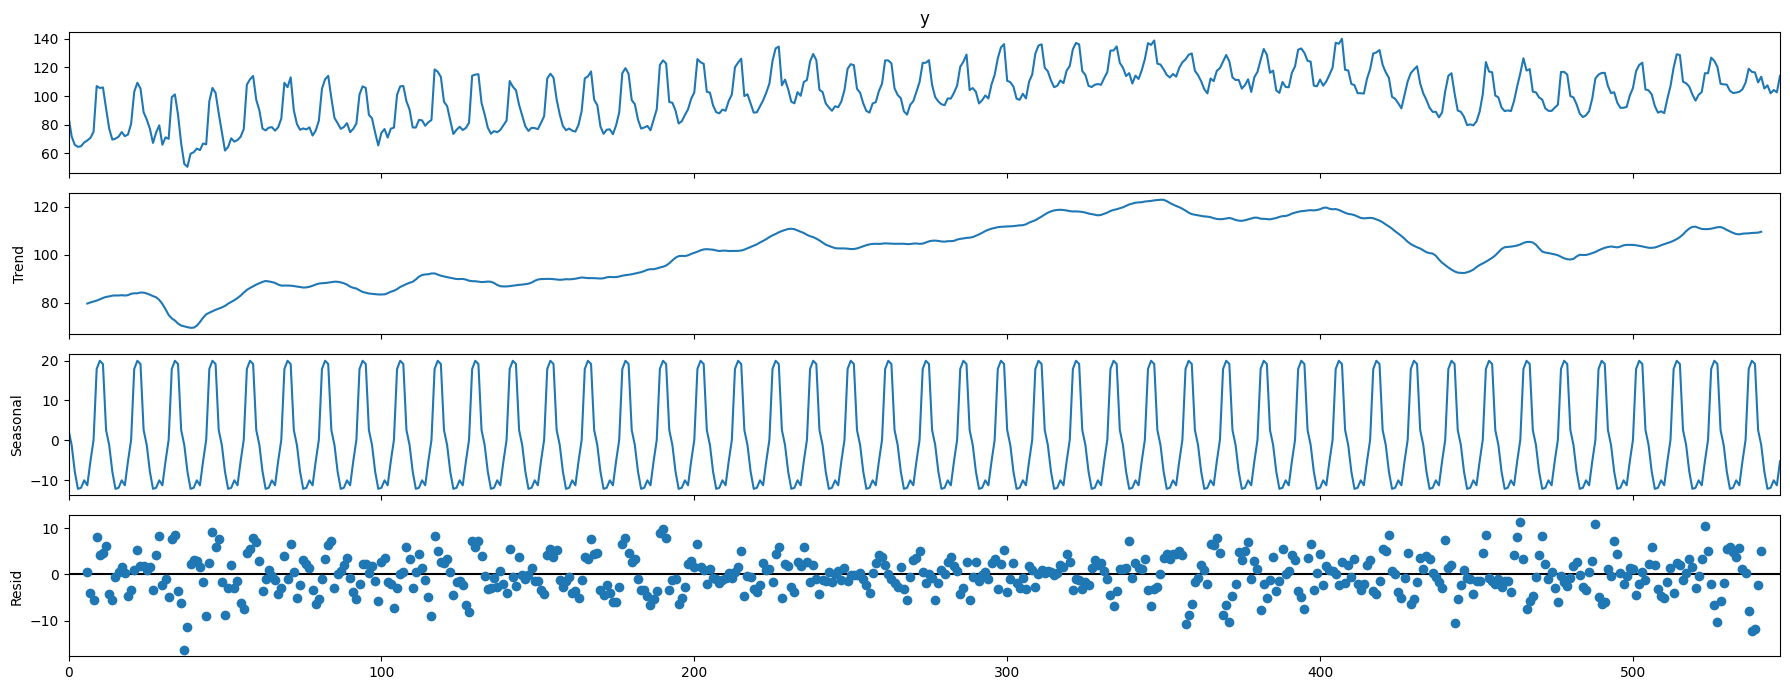

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
a = seasonal_decompose(df["y"], model = "add", period=12)
a.plot();

In [ ]:
Y_train_df = df[df.ds<='2016-08-01']
Y_test_df = df[df.ds>'2016-08-01']

In [ ]:
Y_train_df.shape, Y_test_df.shape

((536, 3), (12, 3))

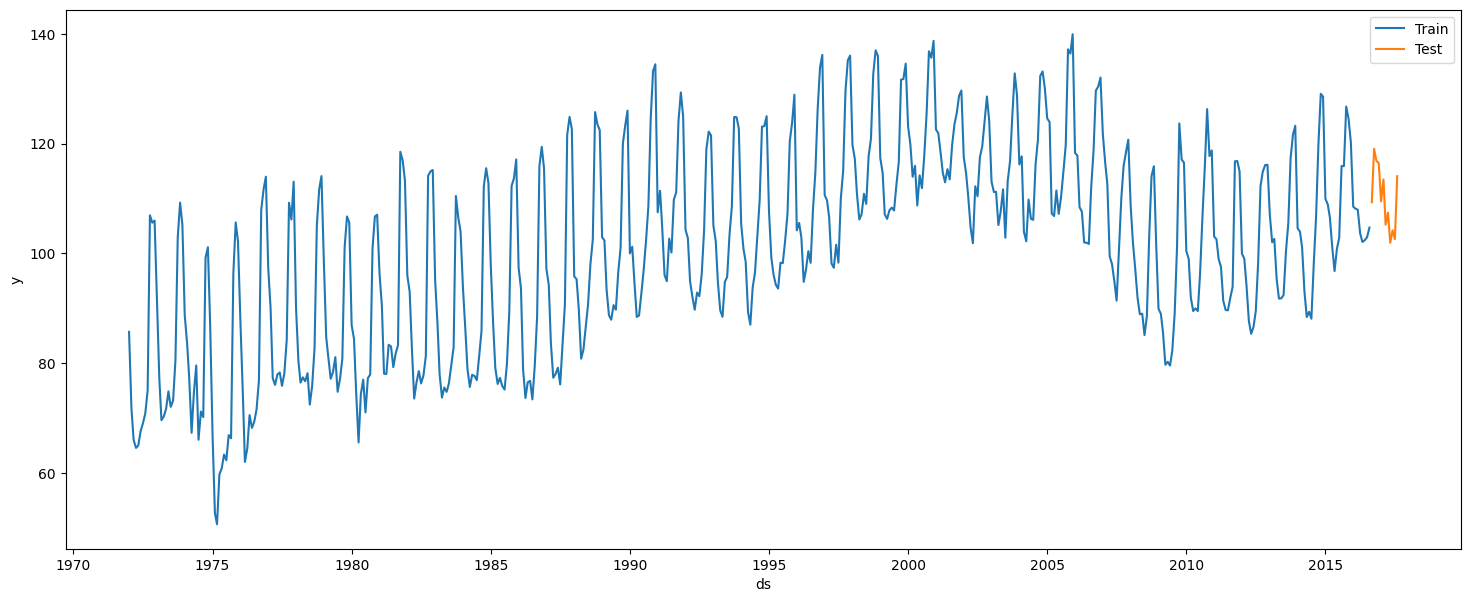

In [ ]:
sns.lineplot(Y_train_df,x="ds", y="y", label="Train")
sns.lineplot(Y_test_df, x="ds", y="y", label="Test")
plt.show()

In [ ]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA
from statsforecast.arima import arima_string

In [ ]:
season_length = 12 # Monthly data
horizon = len(Y_test_df) # number of predictions

models = [AutoARIMA(season_length=season_length)]

In [ ]:
sf = StatsForecast(models=models, freq='MS')

In [ ]:
sf.fit(df=Y_train_df)

/usr/local/lib/python3.11/dist-packages/scipy/optimize/_optimize.py:1173: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(f, fprime, xk, pk, gfk,


StatsForecast(models=[AutoARIMA])

In [ ]:
result=sf.fitted_[0,0].model_
print(result.keys())
print(result['arma'])

dict_keys(['coef', 'sigma2', 'var_coef', 'mask', 'loglik', 'aic', 'arma', 'residuals', 'code', 'n_cond', 'nobs', 'model', 'bic', 'aicc', 'ic', 'xreg', 'x', 'lambda'])
(4, 3, 0, 1, 12, 0, 1)


In [ ]:
residual=pd.DataFrame(result.get("residuals"), columns=["residual Model"])
residual

,residual Model
0,0.085694
1,0.071820
2,0.066022
3,0.064564
4,0.065009
...,...
531,1.597439
532,3.366773
533,1.615486
534,-0.394285


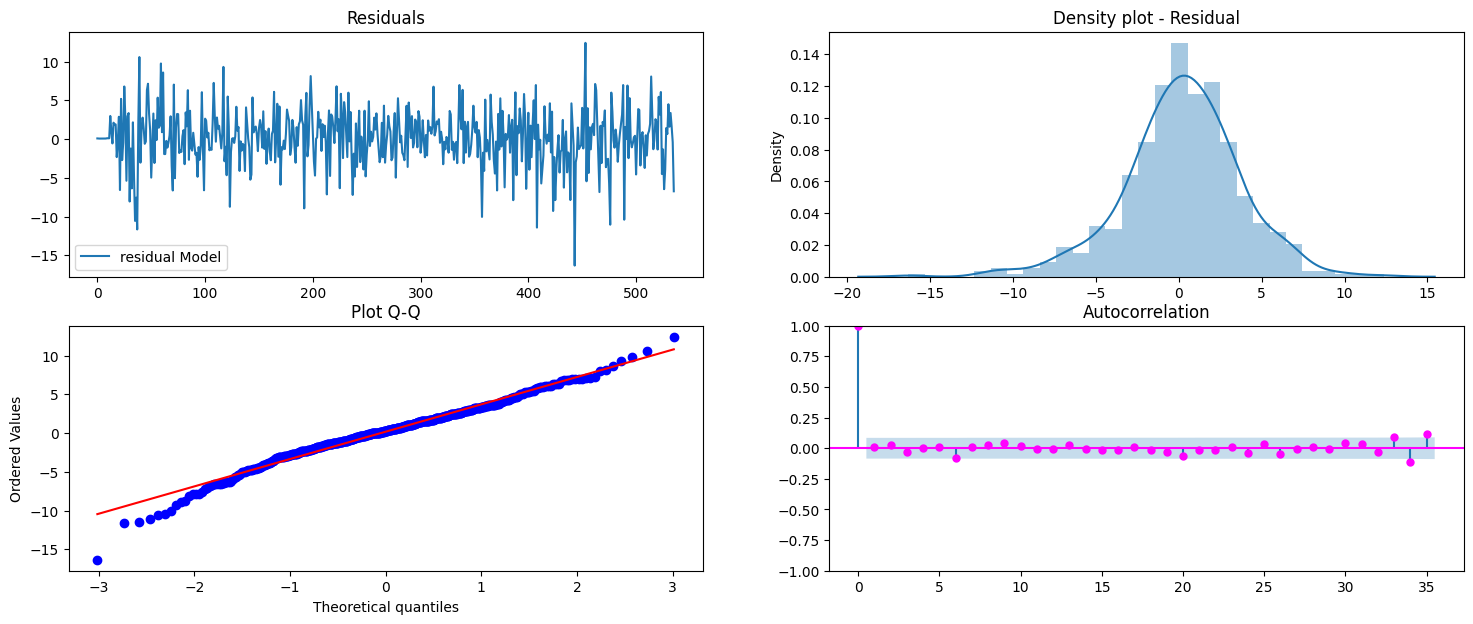

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2)

# plot[1,1]
residual.plot(ax=axs[0,0])
axs[0,0].set_title("Residuals");

# plot
sns.distplot(residual, ax=axs[0,1]);
axs[0,1].set_title("Density plot - Residual");

# plot
stats.probplot(residual["residual Model"], dist="norm", plot=axs[1,0])
axs[1,0].set_title('Plot Q-Q')

# plot
plot_acf(residual,  lags=35, ax=axs[1,1],color="fuchsia")
axs[1,1].set_title("Autocorrelation");

plt.show();

In [ ]:
Y_hat_df = sf.forecast(df=Y_train_df, h=horizon, fitted=True)
Y_hat_df.head()

,unique_id,ds,AutoARIMA
0,1,2016-09-01,111.235874
1,1,2016-10-01,124.948376
2,1,2016-11-01,125.401640
3,1,2016-12-01,123.854827
4,1,2017-01-01,110.439452


In [ ]:
values=sf.forecast_fitted_values()
values

,unique_id,ds,y,AutoARIMA
0,1,1972-01-01,85.6945,85.608806
1,1,1972-02-01,71.8200,71.748180
2,1,1972-03-01,66.0229,65.956878
3,1,1972-04-01,64.5645,64.499936
4,1,1972-05-01,65.0100,64.944991
...,...,...,...,...
531,1,2016-04-01,103.6179,102.020461
532,1,2016-05-01,102.0816,98.714827
533,1,2016-06-01,102.4044,100.788914
534,1,2016-07-01,102.9512,103.345485


In [ ]:
sf.forecast(df=Y_train_df, h=12, level=[95])

,unique_id,ds,AutoARIMA,AutoARIMA-lo-95,AutoARIMA-hi-95
0,1,2016-09-01,111.235874,104.140621,118.331128
1,1,2016-10-01,124.948376,116.244661,133.652090
2,1,2016-11-01,125.401640,115.882093,134.921186
3,1,2016-12-01,123.854827,113.562020,134.147633
4,1,2017-01-01,110.439452,99.669692,121.209212
5,1,2017-02-01,107.658738,96.520585,118.796891
6,1,2017-03-01,105.751286,94.167809,117.334763
7,1,2017-04-01,101.098773,89.240414,112.957133
8,1,2017-05-01,96.666148,84.555653,108.776643
9,1,2017-06-01,98.304448,85.884576,110.724320


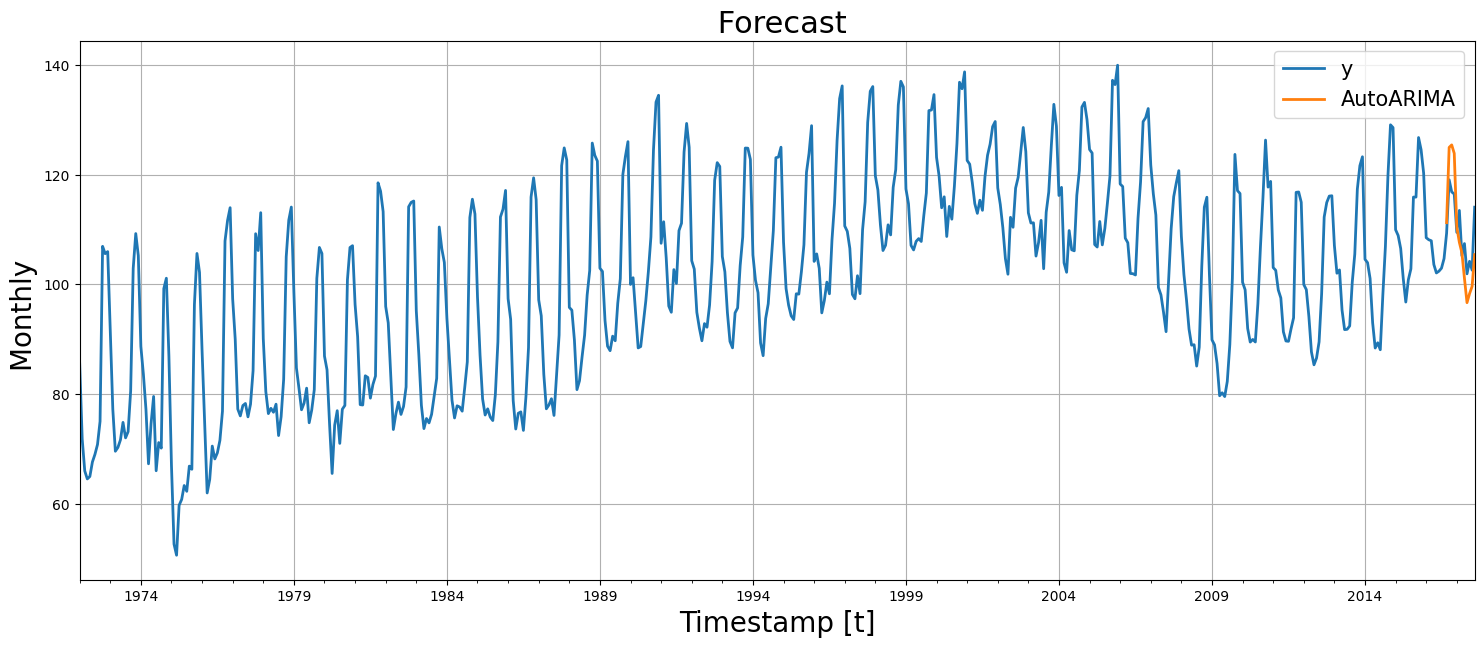

In [ ]:
Y_hat_df = Y_test_df.merge(Y_hat_df, how='left', on=['unique_id', 'ds'])

fig, ax = plt.subplots(1, 1, figsize = (18, 7))
plot_df = pd.concat([Y_train_df, Y_hat_df]).set_index('ds')
plot_df[['y', 'AutoARIMA']].plot(ax=ax, linewidth=2)
ax.set_title(' Forecast', fontsize=22)
ax.set_ylabel('Monthly ', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

In [ ]:
sf.predict(h=12)

,unique_id,ds,AutoARIMA
0,1,2016-09-01,111.235874
1,1,2016-10-01,124.948376
2,1,2016-11-01,125.401640
3,1,2016-12-01,123.854827
4,1,2017-01-01,110.439452
5,1,2017-02-01,107.658738
6,1,2017-03-01,105.751286
7,1,2017-04-01,101.098773
8,1,2017-05-01,96.666148
9,1,2017-06-01,98.304448


In [ ]:
forecast_df = sf.predict(h=12, level = [80, 95])
forecast_df

,unique_id,ds,AutoARIMA,AutoARIMA-lo-95,AutoARIMA-lo-80,AutoARIMA-hi-80,AutoARIMA-hi-95
0,1,2016-09-01,111.235874,104.140621,106.596537,115.875211,118.331128
1,1,2016-10-01,124.948376,116.244661,119.257323,130.639429,133.652090
2,1,2016-11-01,125.401640,115.882093,119.177143,131.626136,134.921186
3,1,2016-12-01,123.854827,113.562020,117.124722,130.584931,134.147633
4,1,2017-01-01,110.439452,99.669692,103.397484,117.481419,121.209212
5,1,2017-02-01,107.658738,96.520585,100.375891,114.941585,118.796891
6,1,2017-03-01,105.751286,94.167809,98.177257,113.325314,117.334763
7,1,2017-04-01,101.098773,89.240414,93.345009,108.852538,112.957133
8,1,2017-05-01,96.666148,84.555653,88.747521,104.584775,108.776643
9,1,2017-06-01,98.304448,85.884576,90.183530,106.425366,110.724320


In [ ]:
df_plot=pd.concat([df, forecast_df]).set_index('ds').tail(220)
df_plot

,y,unique_id,AutoARIMA,AutoARIMA-lo-95,AutoARIMA-lo-80,AutoARIMA-hi-80,AutoARIMA-hi-95
ds,,,,,,,
2000-05-01,108.7202,1,NaN,NaN,NaN,NaN,NaN
2000-06-01,114.2071,1,NaN,NaN,NaN,NaN,NaN
2000-07-01,111.8737,1,NaN,NaN,NaN,NaN,NaN
2000-08-01,117.9027,1,NaN,NaN,NaN,NaN,NaN
2000-09-01,125.6499,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2017-04-01,NaN,1,101.098773,89.240414,93.345009,108.852538,112.957133
2017-05-01,NaN,1,96.666148,84.555653,88.747521,104.584775,108.776643
2017-06-01,NaN,1,98.304448,85.884576,90.183530,106.425366,110.724320


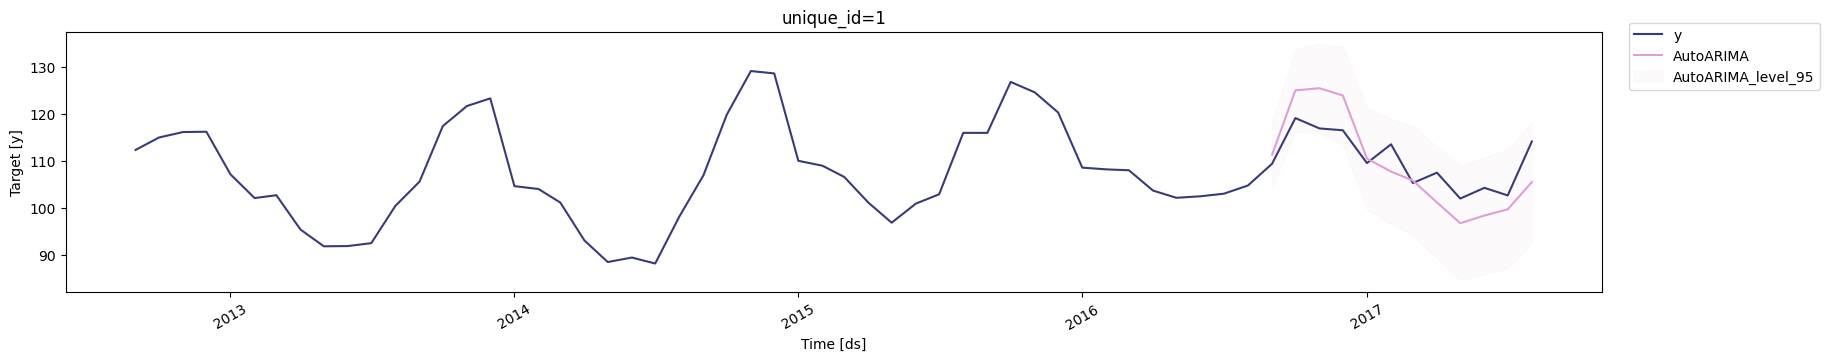

In [ ]:
sf.plot(df, forecast_df, level=[95], max_insample_length=12 * 5)

In [ ]:
crossvalidation_df = sf.cross_validation(df=Y_train_df,
                                         h=12,
                                         step_size=12,
                                         n_windows=5)

In [ ]:
crossvalidation_df.head()

,unique_id,ds,cutoff,y,AutoARIMA
0,1,2011-09-01,2011-08-01,93.9062,105.235606
1,1,2011-10-01,2011-08-01,116.7634,118.739814
2,1,2011-11-01,2011-08-01,116.8258,114.572924
3,1,2011-12-01,2011-08-01,114.9563,114.991219
4,1,2012-01-01,2011-08-01,99.9662,100.133142


In [ ]:
from functools import partial

import utilsforecast.losses as ufl
from utilsforecast.evaluation import evaluate

In [ ]:
evaluate(
    Y_test_df.merge(Y_hat_df),
    metrics=[ufl.mae, ufl.mape, partial(ufl.mase, seasonality=season_length), ufl.rmse, ufl.smape],
    train_df=Y_train_df,
)

,unique_id,metric,AutoARIMA
0,1,mae,5.012894
1,1,mape,0.045046
2,1,mase,0.967601
3,1,rmse,5.680362
4,1,smape,0.022673


# VAR -- VARMA -- VARMAX

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from sklearn.metrics import r2_score, root_mean_squared_error
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('/content/temperature.csv')
df.head()

,record_id,month,day,year,AverageTemperatureFahr,AverageTemperatureUncertaintyFahr,City,country_id,Country,Latitude,Longitude
0,474376,1,1,1853,NaN,NaN,Auckland,NEW,New Zealand,36.17S,175.03E
1,474377,2,1,1853,NaN,NaN,Auckland,NEW,New Zealand,36.17S,175.03E
2,474378,3,1,1853,NaN,NaN,Auckland,NEW,New Zealand,36.17S,175.03E
3,474379,4,1,1853,NaN,NaN,Auckland,NEW,New Zealand,36.17S,175.03E
4,474380,5,1,1853,NaN,NaN,Auckland,NEW,New Zealand,36.17S,175.03E


In [ ]:
df['City'].unique()

array(['Auckland', nan, 'Brasília', 'Canoas', 'Cape Town', 'Hamilton',
       'Johannesburg', 'Kherson', 'Kiev', 'Lvov', 'Marseille', 'Odesa',
       'Paris', 'Stockholm', 'Tokyo', 'Tottori', 'Uppsala', 'Warsaw',
       'Wroclaw'], dtype=object)

In [ ]:
def parse_date(row):
  s = f"{row['year']}-{row['month']}-{row['day']}"
  return datetime.strptime(s, "%Y-%m-%d")

df['Date'] = df.apply(parse_date, axis=1)
auckland = df[df['City'] == 'Auckland'].copy().dropna()
stockholm = df[df['City'] == 'Stockholm'].copy().dropna()

# keep only columns we want
auckland = auckland[['Date', 'AverageTemperatureFahr']].copy()
stockholm = stockholm[['Date', 'AverageTemperatureFahr']].copy()

# set index to date col
auckland.set_index(auckland['Date'], inplace=True)
auckland.drop('Date', axis=1, inplace=True)
auckland.columns = ['AucklandTemp']
auckland.head()

,AucklandTemp
Date,
1853-06-01,51.9062
1853-07-01,52.3886
1853-08-01,52.8530
1853-09-01,52.5776
1853-10-01,54.8726


In [ ]:
stockholm.set_index(stockholm['Date'], inplace=True)
stockholm.drop('Date', axis=1, inplace=True)

stockholm.columns = ['StockholmTemp']
stockholm.head()

,StockholmTemp
Date,
1743-11-01,42.8414
1744-04-01,36.8888
1744-05-01,45.1220
1744-06-01,53.1824
1744-07-01,60.0260


In [ ]:
joined = auckland.join(stockholm, how='outer') # has some missing data
joined.shape

joined_part = joined.iloc[-500:].copy()
joined_part.index.freq = 'MS'
joined_part.isna().sum()

,0
AucklandTemp,1
StockholmTemp,4


In [ ]:
joined_part.interpolate(inplace=True)

joined_part.isna().sum() # now all 0

,0
AucklandTemp,0
StockholmTemp,0


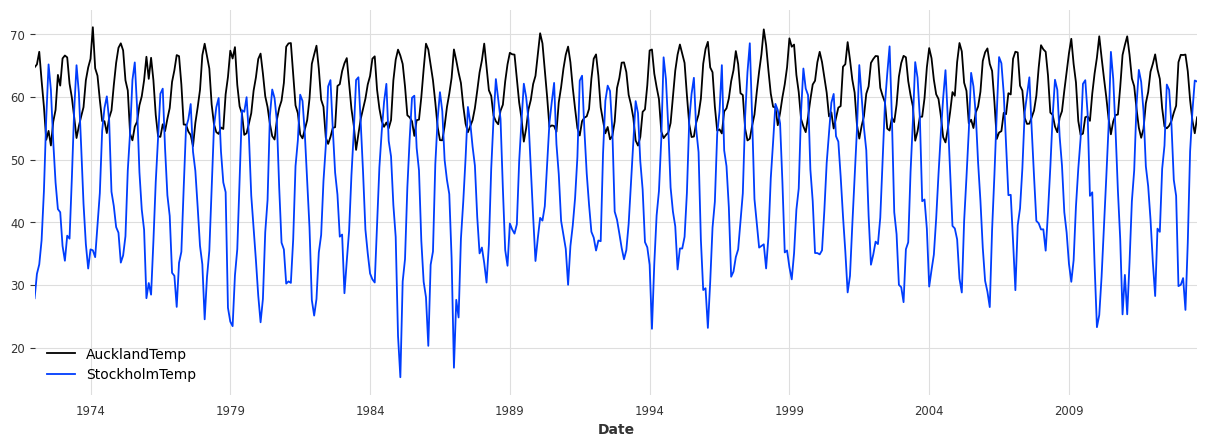

In [ ]:
joined_part.plot(figsize=(15, 5));

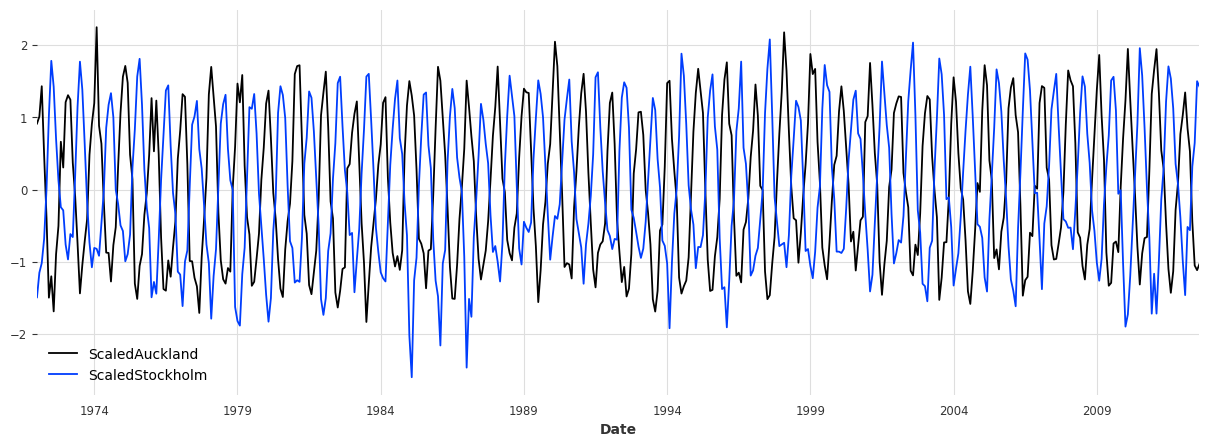

In [ ]:
Ntest = 12
train = joined_part.iloc[:-Ntest].copy()
test = joined_part.iloc[-Ntest:].copy()

scaler_auckland = StandardScaler()

train['ScaledAuckland'] = scaler_auckland.fit_transform(train[['AucklandTemp']])
test['ScaledAuckland'] = scaler_auckland.transform(test[['AucklandTemp']])

scaler_stockholm = StandardScaler()
train['ScaledStockholm'] = scaler_stockholm.fit_transform(
    train[['StockholmTemp']])
test['ScaledStockholm'] = scaler_stockholm.transform(test[['StockholmTemp']])

train_idx = joined_part.index <= train.index[-1]
test_idx = joined_part.index > train.index[-1]

# put them back in original df
joined_part.loc[train_idx, 'ScaledAuckland'] = train['ScaledAuckland']
joined_part.loc[test_idx, 'ScaledAuckland'] = test['ScaledAuckland']
joined_part.loc[train_idx, 'ScaledStockholm'] = train['ScaledStockholm']
joined_part.loc[test_idx, 'ScaledStockholm'] = test['ScaledStockholm']
cols = ['ScaledAuckland', 'ScaledStockholm']
train[cols].plot(figsize=(15, 5));

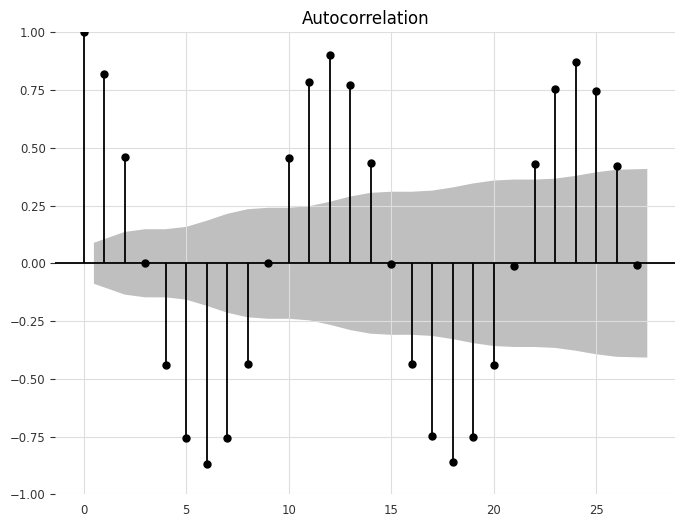

In [ ]:
plot_acf(train['ScaledAuckland']);

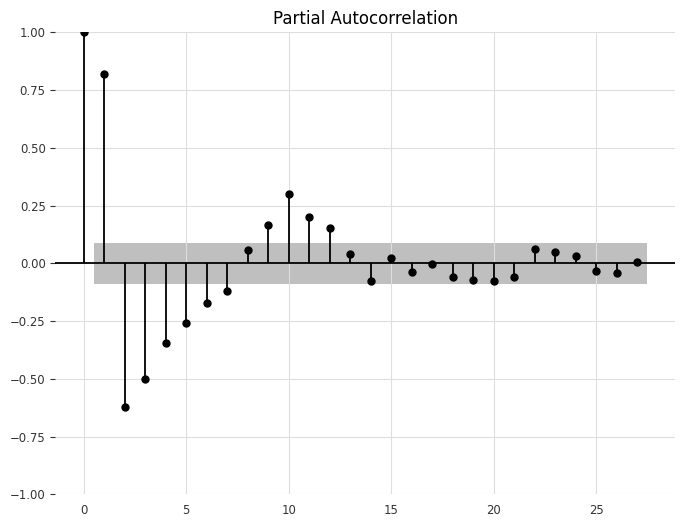

In [ ]:
plot_pacf(train['ScaledAuckland']);

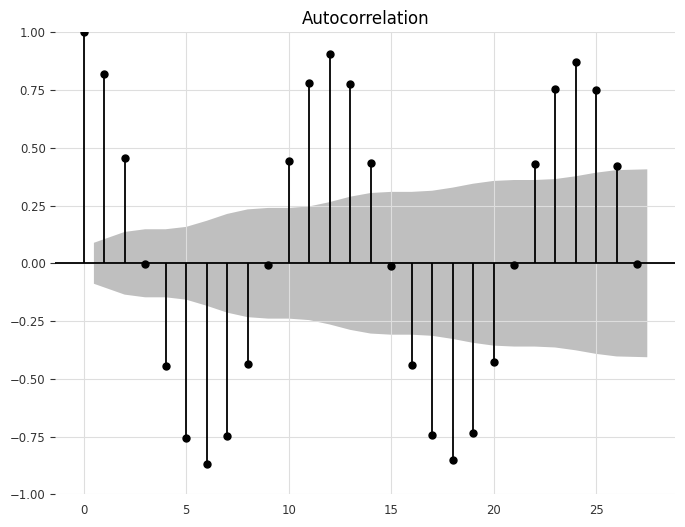

In [ ]:
plot_acf(train['ScaledStockholm']);

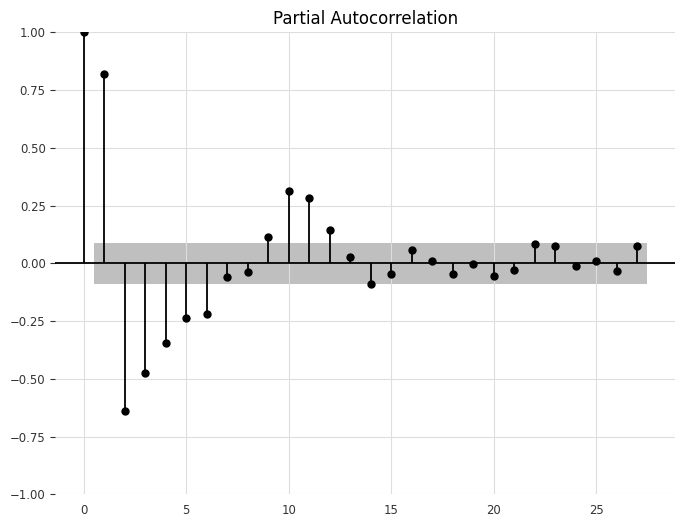

In [ ]:
plot_pacf(train['ScaledStockholm']);

In [ ]:
datetime.now()

datetime.datetime(2025, 7, 2, 6, 50, 6, 400571)

In [ ]:
t0 = datetime.now()
model = VARMAX(train[cols], order=(10, 10))
res = model.fit(maxiter=100)
print("Duration:", datetime.now() - t0)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Duration: 0:02:44.851822


In [ ]:
fcast = res.get_forecast(Ntest)

In [ ]:
res.fittedvalues['ScaledAuckland']

,ScaledAuckland
Date,
1972-01-01,-0.000846
1972-02-01,0.834437
1972-03-01,0.717119
1972-04-01,0.815227
1972-05-01,-0.077862
...,...
2012-04-01,0.525749
2012-05-01,-0.287172
2012-06-01,-1.061292


In [ ]:
joined_part.loc[train_idx, 'Train Pred Auckland'] = \
  res.fittedvalues['ScaledAuckland']
joined_part.loc[test_idx, 'Test Pred Auckland'] = \
  fcast.predicted_mean['ScaledAuckland']

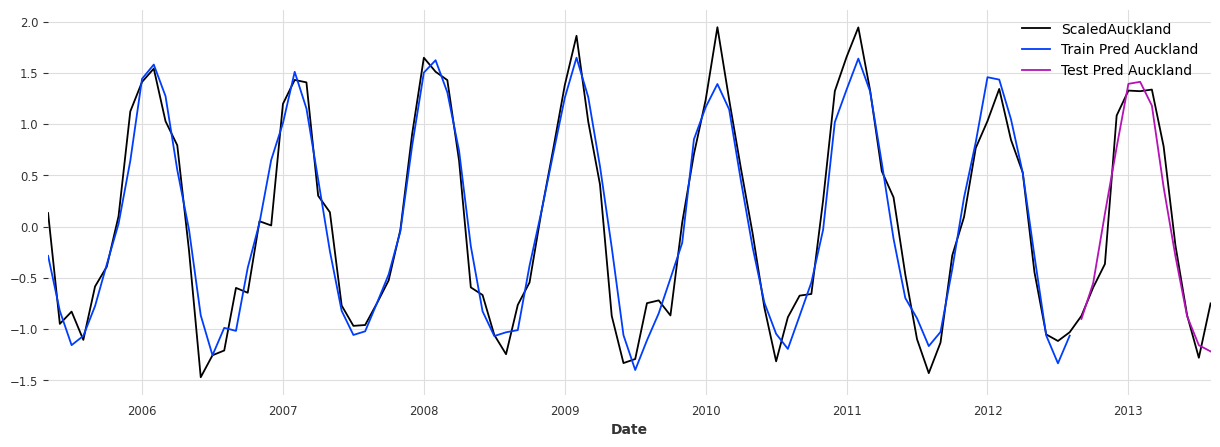

In [ ]:
plot_cols = ['ScaledAuckland', 'Train Pred Auckland', 'Test Pred Auckland']
joined_part.iloc[-100:][plot_cols].plot(figsize=(15, 5));

In [ ]:
joined_part.loc[train_idx, 'Train Pred Stockholm'] = \
  res.fittedvalues['ScaledStockholm']
joined_part.loc[test_idx, 'Test Pred Stockholm'] = \
  fcast.predicted_mean['ScaledStockholm']

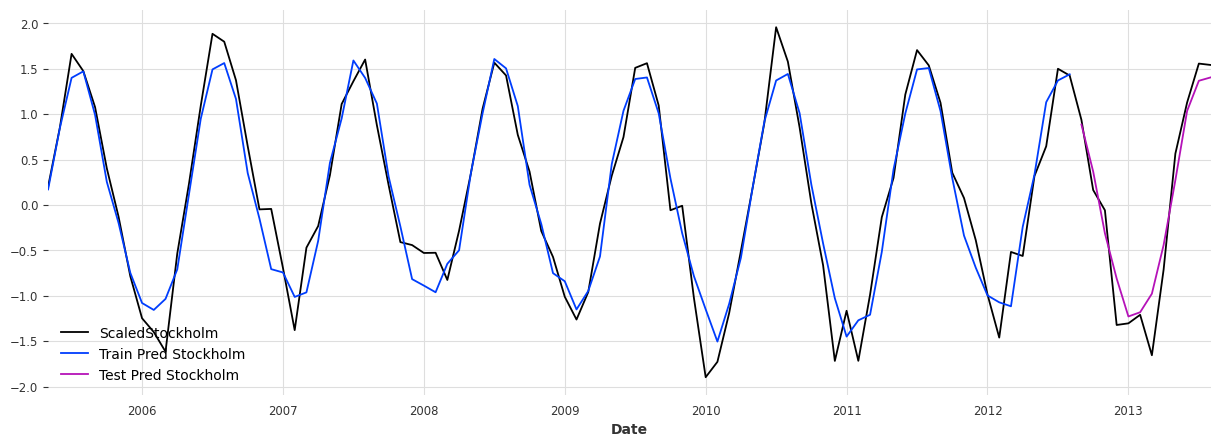

In [ ]:
plot_cols = ['ScaledStockholm', 'Train Pred Stockholm', 'Test Pred Stockholm']
joined_part.iloc[-100:][plot_cols].plot(figsize=(15, 5));

In [ ]:
y_pred = joined_part.loc[train_idx, 'Train Pred Auckland']
y_true = joined_part.loc[train_idx, 'ScaledAuckland']
print("Auckland Train RMSE:", root_mean_squared_error(y_true, y_pred))

y_pred = joined_part.loc[test_idx, 'Test Pred Auckland']
y_true = joined_part.loc[test_idx, 'ScaledAuckland']
print("Auckland Test RMSE:", root_mean_squared_error(y_true, y_pred))

In [ ]:
y_pred = joined_part.loc[train_idx, 'Train Pred Stockholm']
y_true = joined_part.loc[train_idx, 'ScaledStockholm']
print("Stockholm Train RMSE:", root_mean_squared_error(y_true, y_pred))

y_pred = joined_part.loc[test_idx, 'Test Pred Stockholm']
y_true = joined_part.loc[test_idx, 'ScaledStockholm']
print("Stockholm Test RMSE:", root_mean_squared_error(y_true, y_pred))

Stockholm Train RMSE: 0.2744935982570833
Stockholm Test RMSE: 0.29688402179054024


### VAR

In [ ]:
model = VAR(train[cols])

In [ ]:
lag_order_results = model.select_order(maxlags=15)
lag_order_results

In [ ]:
lag_order_results.selected_orders

{'aic': np.int64(12),
 'bic': np.int64(6),
 'hqic': np.int64(11),
 'fpe': np.int64(12)}

In [ ]:
results = model.fit(maxlags=15, ic='aic')

In [ ]:
lag_order = results.k_ar

In [ ]:
prior = train.iloc[-lag_order:][cols].to_numpy() # why need this?
fcast = results.forecast(prior, Ntest)

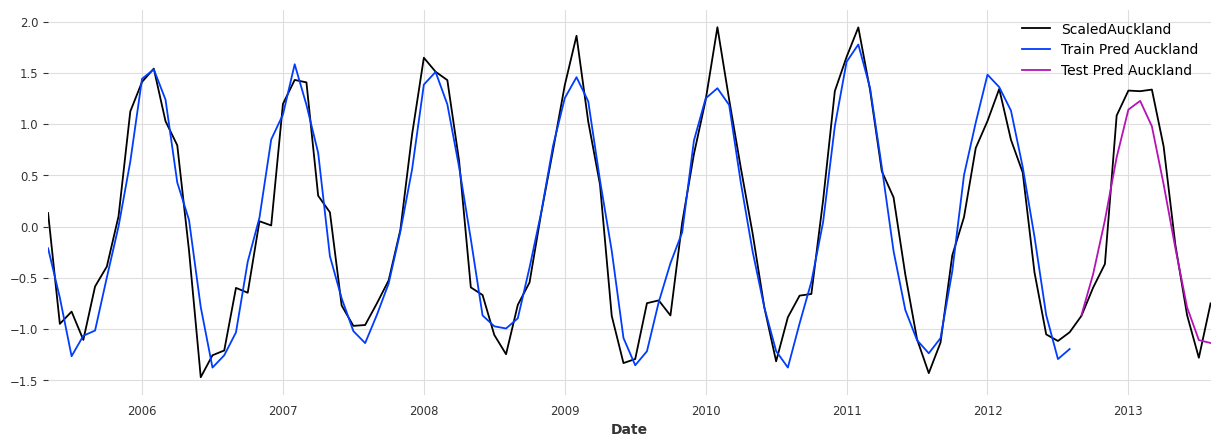

In [ ]:
joined_part.loc[train_idx, 'Train Pred Auckland'] = \
  results.fittedvalues['ScaledAuckland']
joined_part.loc[test_idx, 'Test Pred Auckland'] = \
  fcast[:,0]

plot_cols = ['ScaledAuckland', 'Train Pred Auckland', 'Test Pred Auckland']
joined_part.iloc[-100:][plot_cols].plot(figsize=(15, 5));

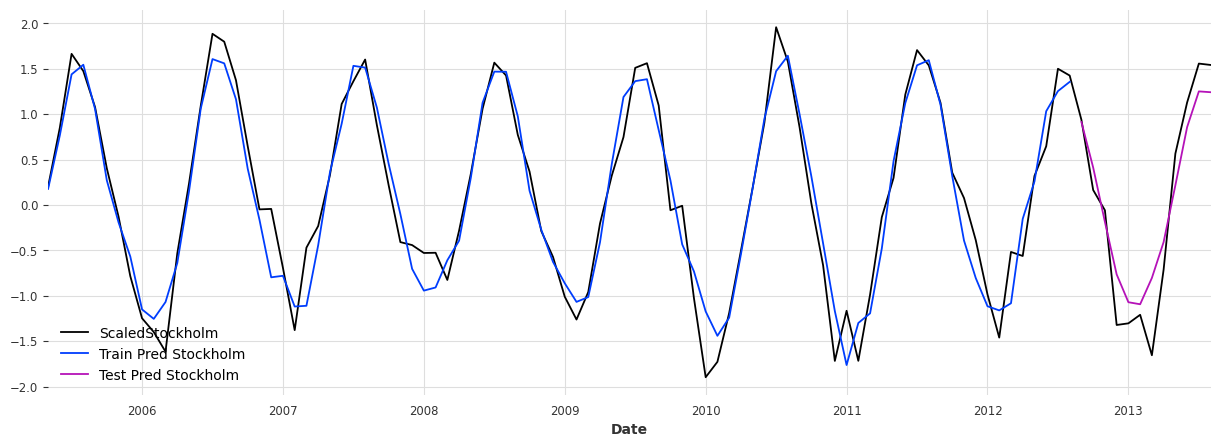

In [ ]:
joined_part.loc[train_idx, 'Train Pred Stockholm'] = \
  results.fittedvalues['ScaledStockholm']
joined_part.loc[test_idx, 'Test Pred Stockholm'] = \
  fcast[:,1]

plot_cols = ['ScaledStockholm', 'Train Pred Stockholm', 'Test Pred Stockholm']
joined_part.iloc[-100:][plot_cols].plot(figsize=(15, 5));

In [ ]:
y_pred = joined_part.loc[train_idx, 'Train Pred Auckland']
y_true = joined_part.loc[train_idx, 'ScaledAuckland']
y_true = y_true.iloc[lag_order:]
y_pred = y_pred.iloc[lag_order:]
print("Auckland Train RMSE:", root_mean_squared_error(y_true, y_pred))

y_pred = joined_part.loc[test_idx, 'Test Pred Auckland']
y_true = joined_part.loc[test_idx, 'ScaledAuckland']
print("Auckland Test RMSE:", root_mean_squared_error(y_true, y_pred))

Auckland Train RMSE: 0.2808283067197973
Auckland Test RMSE: 0.2677944021377368


In [ ]:
y_pred = joined_part.loc[train_idx, 'Train Pred Stockholm']
y_true = joined_part.loc[train_idx, 'ScaledStockholm']
y_true = y_true.iloc[lag_order:]
y_pred = y_pred.iloc[lag_order:]
print("Stockholm Train RMSE:", root_mean_squared_error(y_true, y_pred))

y_pred = joined_part.loc[test_idx, 'Test Pred Stockholm']
y_true = joined_part.loc[test_idx, 'ScaledStockholm']
print("Stockholm Test RMSE:", root_mean_squared_error(y_true, y_pred))

Stockholm Train RMSE: 0.2707467959754148
Stockholm Test RMSE: 0.3709460045661122


In [ ]:
## Implementing ARIMA on this data
from statsmodels.tsa.arima.model import ARIMA

for col in cols:
  model = ARIMA(train[col], order=(10, 0, 10))
  res = model.fit()
  fcast = res.get_forecast(Ntest)
  print(f"{col} Train RMSE:", root_mean_squared_error(joined_part.loc[train_idx, col], res.fittedvalues))
  print(f"{col} Test RMSE:", root_mean_squared_error(joined_part.loc[test_idx, col], fcast.predicted_mean))

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ScaledAuckland Train RMSE: 0.280400099964901
ScaledAuckland Test RMSE: 0.24074887078989138
ScaledStockholm Train RMSE: 0.28153670107471696
ScaledStockholm Test RMSE: 0.25817476920484983


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
## Implementing ARIMA on this data
from statsmodels.tsa.arima.model import ARIMA

for col in cols:
  model = ARIMA(train[col], order=(10, 0, 10))
  res = model.fit()
  fcast = res.get_forecast(Ntest)
  print(f"{col} Train RMSE:", root_mean_squared_error(joined_part.loc[train_idx, col], res.fittedvalues))
  print(f"{col} Test RMSE:", root_mean_squared_error(joined_part.loc[test_idx, col], fcast.predicted_mean))

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ScaledAuckland Train RMSE: 0.280400099964901
ScaledAuckland Test RMSE: 0.24074887078989138
ScaledStockholm Train RMSE: 0.28153670107471696
ScaledStockholm Test RMSE: 0.25817476920484983
